In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = np.loadtxt('DecayTimesData.txt')
data.shape

(10000,)

In [18]:
def nll(theta,t):
    f,tau1,tau2 = theta
    return -np.sum(np.log(f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)))  

def pdf(theta,t):
    f,tau1,tau2 = theta
    return f*(1/tau1)*np.exp(-t/tau1)+(1-f)*(1/tau2)*np.exp(-t/tau2)

In [19]:
pdf([0.74849482,  0.19783713,  1.30720412],0.)

3.9757883098550821

In [20]:
np.max(pdf([0.74849482,  0.19783713,  1.30720412],data))

3.9755564634627798

In [21]:
tnc_result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='TNC')
tnc_result

     fun: 885.07133658680982
     jac: array([ 0.00713953, -0.01145963,  0.00449063])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 3
     nit: 1
  status: 1
 success: True
       x: array([ 0.74849409,  0.1978367 ,  1.30720393])

In [22]:
nm_result = optimize.minimize(nll, [ 0.74849482,  0.19783713,  1.30720412], args=(data),method='Nelder-mead')
nm_result

 final_simplex: (array([[ 0.74849482,  0.19783713,  1.30720412],
       [ 0.74849624,  0.19783055,  1.30721464],
       [ 0.7484941 ,  0.19783655,  1.30712747],
       [ 0.7485167 ,  0.19783941,  1.30723005]]), array([ 885.0713366 ,  885.07133929,  885.07133961,  885.07134091]))
           fun: 885.07133659655426
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 50
        status: 0
       success: True
             x: array([ 0.74849482,  0.19783713,  1.30720412])

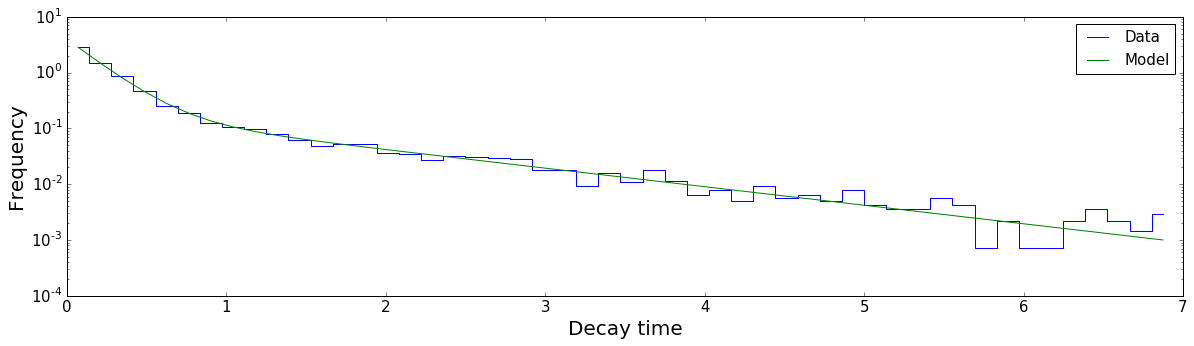

In [25]:
f,bins = np.histogram(data,bins=50,normed=True)
step = bins[1]-bins[0]
plt.figure(figsize=(20,5))
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid',label='Data')
plt.plot([t for t in np.arange(step/2,7,step)],[pdf(tnc_result['x'],t) for t in np.arange(step/2,7,step)],label='Model')
plt.yscale('log')
plt.xlabel('Decay time',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

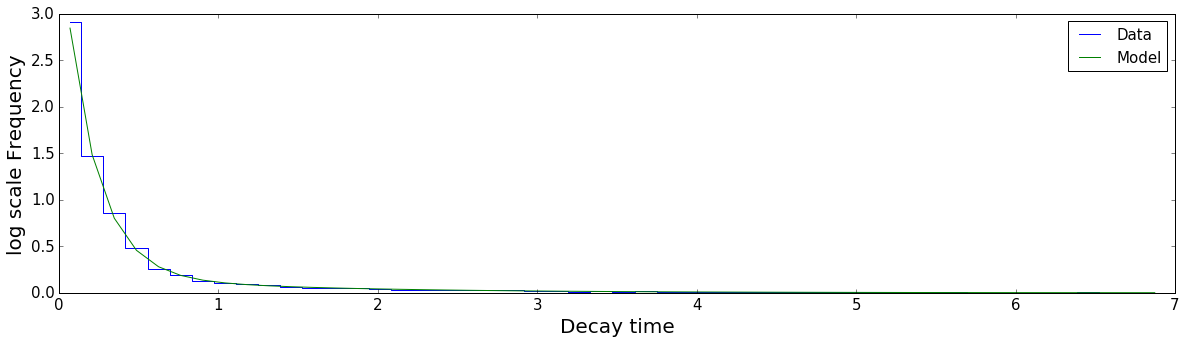

In [28]:
f,bins = np.histogram(data,bins=50,normed=True)
step = bins[1]-bins[0]
plt.figure(figsize=(20,5))
plt.plot(bins[1:]-step/2,f,drawstyle='steps-mid',label='Data')
plt.plot([t for t in np.arange(step/2,7,step)],[pdf(tnc_result['x'],t) for t in np.arange(step/2,7,step)],label='Model')
plt.xlabel('Decay time',fontsize=20)
plt.ylabel('log scale Frequency',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)

In [132]:
def errors(params,idx,bounds):
    plt.figure(figsize=(5,5))
    if idx == 0:
        x = [[params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
                [nll([params[0]+dx,params[1],params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])]]
        plt.plot(x[0],x[1])
    elif idx == 1:
        x = [[params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
                [nll([params[0],params[1]+dx,params[2]],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])]]
        plt.plot(x[0],x[1])
    elif idx ==2 :
        x = [[params[idx]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])],
                [nll([params[0],params[1],params[2]+dx],data) for dx in np.arange(bounds[0],bounds[1],bounds[2])]]
        plt.plot(x[0],x[1])
    else:
        print('invalid idx input')
    plt.plot([params[idx]+bounds[0],params[idx]+bounds[1]],[nll(params,data)+0.5,nll(params,data)+0.5])
    plt.plot([params[idx]],[tnc_result['fun']],'ro')
    plt.ylabel('$\mathcal{N}\mathcal{N}\mathcal{L}$',fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    return np.array(x)

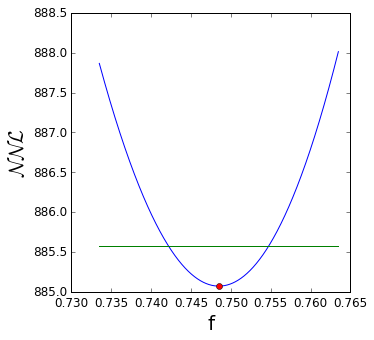

In [157]:
f_errors = errors(tnc_result['x'],0,[-0.015,0.015,0.00001])
plt.xlabel('f',fontsize=20)

In [158]:
sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(f_errors[1]):
    if sigma_nll > n:
        print(i)
        l = i
        break

sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(f_errors[1][l:]):
    if sigma_nll < n:
        print(i)
        u = i
        break
        
f_errors[1][l], f_errors[0][l], f_errors[1][u], f_errors[0][u], f_errors[0][u]- f_errors[0][l]

871
1253


(885.56981028576433,
 0.74220409346936256,
 885.14869922076446,
 0.74602409346936238,
 0.0038199999999998235)

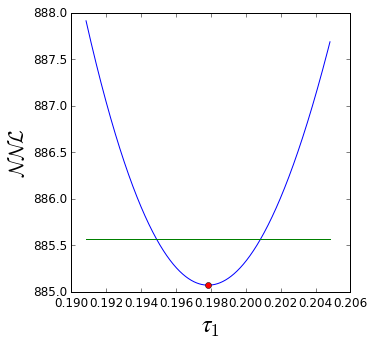

In [159]:
tau1_errors = errors(tnc_result['x'],1,[-0.007,0.007,0.00001])
plt.xlabel('$τ_1$',fontsize=24)

In [160]:
sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(tau1_errors[1]):
    if sigma_nll > n:
        print(i)
        l = i
        break

sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(tau1_errors[1][l:]):
    if sigma_nll < n:
        print(i)
        u = i
        break
        
tau1_errors[1][l], tau1_errors[0][l], tau1_errors[1][u], tau1_errors[0][u], tau1_errors[0][u]- tau1_errors[0][l]

403
600


(885.57122267324132,
 0.19486670081167656,
 885.12737745803372,
 0.19683670081167648,
 0.0019699999999999163)

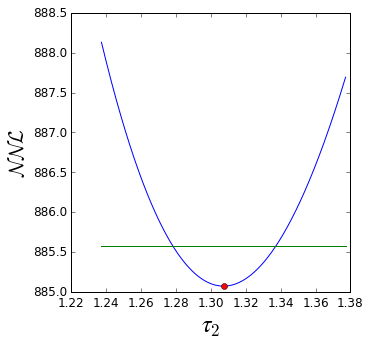

In [163]:
tau2_errors = errors(tnc_result['x'],2,[-0.07,0.07,0.00001])
plt.xlabel('$τ_2$',fontsize=24)

In [164]:
sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(tau2_errors[1]):
    if sigma_nll > n:
        print(i)
        l = i
        break

sigma_nll =  nll(tnc_result['x'],data)+0.5
for i,n in enumerate(tau2_errors[1][l:]):
    if sigma_nll < n:
        print(i)
        u = i
        break
        
tau2_errors[1][l], tau2_errors[0][l], tau2_errors[1][u], tau2_errors[0][u], tau2_errors[0][u]- tau2_errors[0][l]

4103
5890


(885.57115046126,
 1.2782339289242051,
 885.1432260784112,
 1.2961039289241982,
 0.017869999999993169)

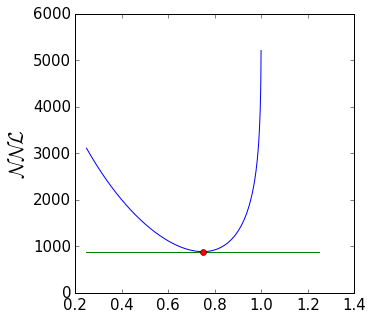

In [43]:
errors(tnc_result['x'],0,[-0.5,0.5,0.001])

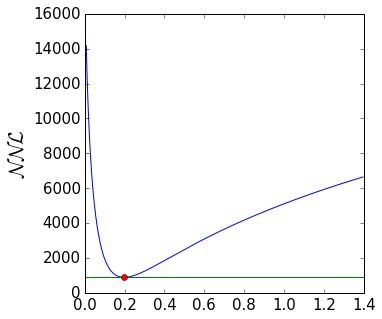

In [48]:
errors(tnc_result['x'],1,[-0.19,1.2,0.001])

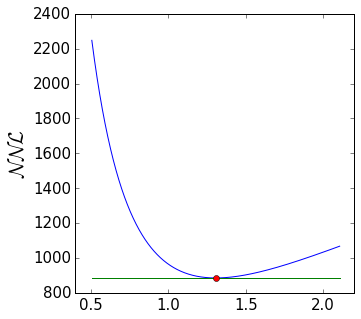

In [50]:
errors(tnc_result['x'],2,[-0.8,0.8,0.001])

In [62]:
bounds = [-0.1,0.5,0.01]
X = [tnc_result['x'][0]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Y = [tnc_result['x'][1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]

Z = np.empty([len(X),len(Y)])

for i,x in enumerate(X):
    Z[i] = np.array([nll([x,y,tnc_result['x'][2]],data) for y in Y])   

In [63]:
nll([0.8,1.4,tnc_result['x'][2]],data)

6679.0272031962013

In [64]:
counter = 0
for item in pdf([1.,1.5,tnc_result['x'][2]],data):
    if item < 0:
        counter += 1
counter

0

In [65]:
len(X), len(Y), Z.shape

(60, 60, (60, 60))

In [66]:
Z[0], [X[0], Y[0]]

(array([ 1704.76794304,  1489.34810968,  1324.45126774,  1200.40238567,
         1109.59056954,  1045.97191455,  1004.70905651,   981.9035    ,
          974.39351964,   979.59976879,   995.40627323,  1020.0680119 ,
         1052.13866412,  1090.41377379,  1133.88578193,  1181.70825518,
         1233.16728119,  1287.65848019,  1344.66843898,  1403.75964367,
         1464.55819252,  1526.74372779,  1590.04114636,  1654.21374278,
         1719.05751111,  1784.39638865,  1850.07826853,  1915.97164328,
         1981.96276817,  2047.95325475,  2113.85802212,  2179.6035466 ,
         2245.12636161,  2310.37176799,  2375.29272197,  2439.84887387,
         2504.00573483,  2567.73395292,  2631.00868298,  2693.80903683,
         2756.11760292,  2817.92002584,  2879.20463785,  2939.96213542,
         3000.18529514,  3059.86872378,  3119.00863833,  3177.60267217,
         3235.64970418,  3293.14970795,  3350.10361855,  3406.51321489,
         3462.38101558,  3517.71018681,  3572.50446062,  3626.76

<a list of 17 text.Text objects>

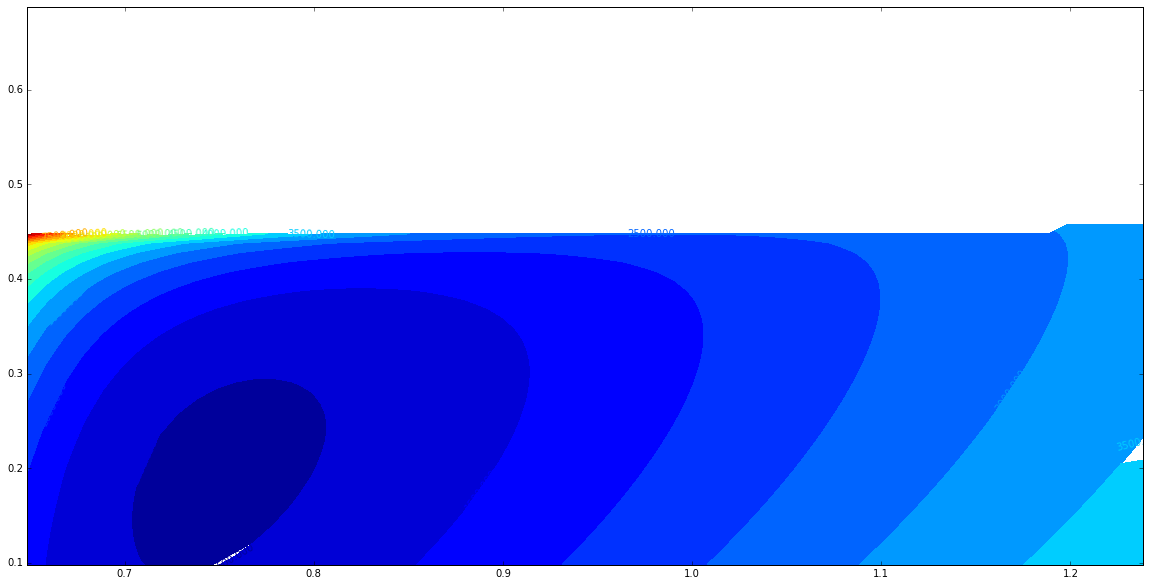

In [68]:
plt.figure(figsize=(20,10))
CS = plt.contourf(X, Y, Z, 20)
plt.clabel(CS, inline=1, fontsize=10)

In [90]:
bounds = [-0.1,0.1,0.001]
X = [tnc_result['x'][2]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Y = [tnc_result['x'][0]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]

Z = np.empty([len(Y),len(Y)])

for i,x in enumerate(X):
    Z[i] = np.array([nll([y,tnc_result['x'][1],x],data) for y in Y])   

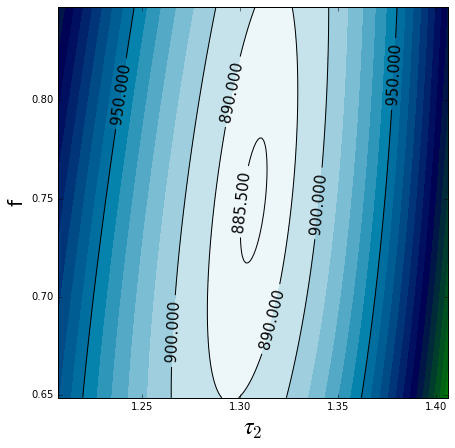

In [110]:
plt.figure(figsize=(7,7))
plt.contourf(X, Y, Z, 20,cmap='ocean_r')
CS = plt.contour(X, Y, Z, levels=[885.5,890,900,950], colors='k')
plt.clabel(CS, inline=1, fontsize=15)
plt.xlabel('$τ_2$',fontsize=24)
plt.ylabel('f',fontsize=20)

In [114]:
bounds = [-0.1,0.1,0.001]
X = [tnc_result['x'][1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Y = [tnc_result['x'][0]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]

Z = np.empty([len(Y),len(Y)])

for i,x in enumerate(X):
    Z[i] = np.array([nll([y,x,tnc_result['x'][2]],data) for y in Y])   

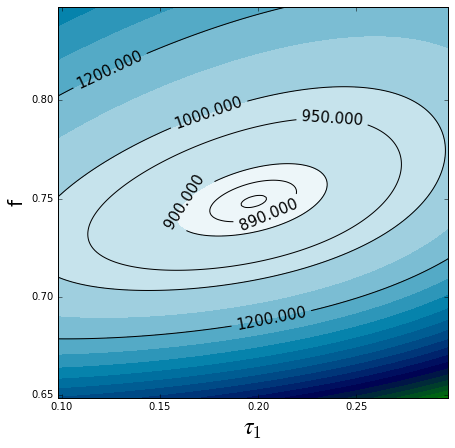

In [118]:
plt.figure(figsize=(7,7))
plt.contourf(X, Y, Z, 20,cmap='ocean_r')
CS = plt.contour(X, Y, Z, levels=[885.5,890,900,950,1000,1200], colors='k')
plt.clabel(CS, inline=1, fontsize=15)
plt.xlabel('$τ_1$',fontsize=24)
plt.ylabel('f',fontsize=20)

In [119]:
bounds = [-0.1,0.1,0.001]
X = [tnc_result['x'][1]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]
Y = [tnc_result['x'][2]+dx for dx in np.arange(bounds[0],bounds[1],bounds[2])]

Z = np.empty([len(Y),len(Y)])

for i,x in enumerate(X):
    Z[i] = np.array([nll([tnc_result['x'][0],x,y],data) for y in Y])   

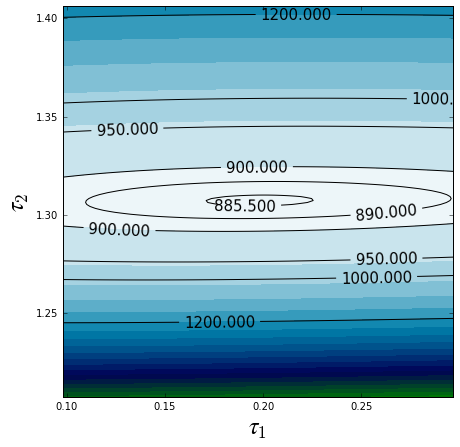

In [121]:
plt.figure(figsize=(7,7))
plt.contourf(X, Y, Z, 20,cmap='ocean_r')
CS = plt.contour(X, Y, Z, levels=[885.5,890,900,950,1000,1200], colors='k')
plt.clabel(CS, inline=1, fontsize=15)
plt.xlabel('$τ_1$',fontsize=24)
plt.ylabel('$τ_2$',fontsize=24)